# Regression between sea level height and the nearest wind stress data point

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [93]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs

data_type = 'historical' # For data_type choose ['historical', 'piControl', 'ssp119', 'ssp126', 'ssp245' 'ssp370', 'ssp585']

station_names = imprt.station_names()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot cmip6 sea level data (zos) historical

In [2]:
# Open data file
zos = imprt.import_cmip6_slh_data()

In [3]:
zos.zos

<xarray.DataArray 'zos' (station: 7, model: 51, time: 165)>
array([[[-2.968779, -0.916701, ...,  2.44577 ,  6.752422],
        [ 5.187391,  5.653142, ...,  6.599367,  3.661862],
        ...,
        [ 1.739577, -1.595436, ...,  0.341929, -1.614   ],
        [ 4.812175,  4.525625, ..., -3.034698, -2.654772]],

       [[-2.968779, -0.916701, ...,  2.44577 ,  6.752422],
        [ 5.187391,  5.653142, ...,  6.599367,  3.661862],
        ...,
        [ 1.739577, -1.595436, ...,  0.341929, -1.614   ],
        [ 4.812175,  4.525625, ..., -3.034698, -2.654772]],

       ...,

       [[-3.628358,  0.425936, ...,  4.234402,  7.748919],
        [ 6.26586 ,  5.828804, ...,  6.087028,  2.669368],
        ...,
        [ 4.224892,  1.508158, ...,  4.325192, -0.315416],
        [ 1.578135,  2.726276, ..., -4.703424, -3.846786]],

       [[-3.425896,  0.016901, ...,  3.855741,  7.528384],
        [ 5.986613,  6.086028, ...,  6.06833 ,  2.592195],
        ...,
        [ 3.410599, -0.178331, ...,  3.315073, -0.922042],
        [ 3.292033,  3.575261, ..., -3.951304, -3.087914]]])
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * station  (station) object 'Vlissingen' 'Hoek v. Holland' ... 'Average'
Attributes:
    units:              cm
    long_name:          Ocean dynamic sea level
    ref_period:         The folowing reference period 1986-2005, including 20...
    regridding_method:  xESMF package with bilinear
    variant:            r1i1p1f1
    branching_method:   unsing_branching_time
    detrending_order:   1
    station:            Vlissingen
    lat:                51.5
    lon:                3.5

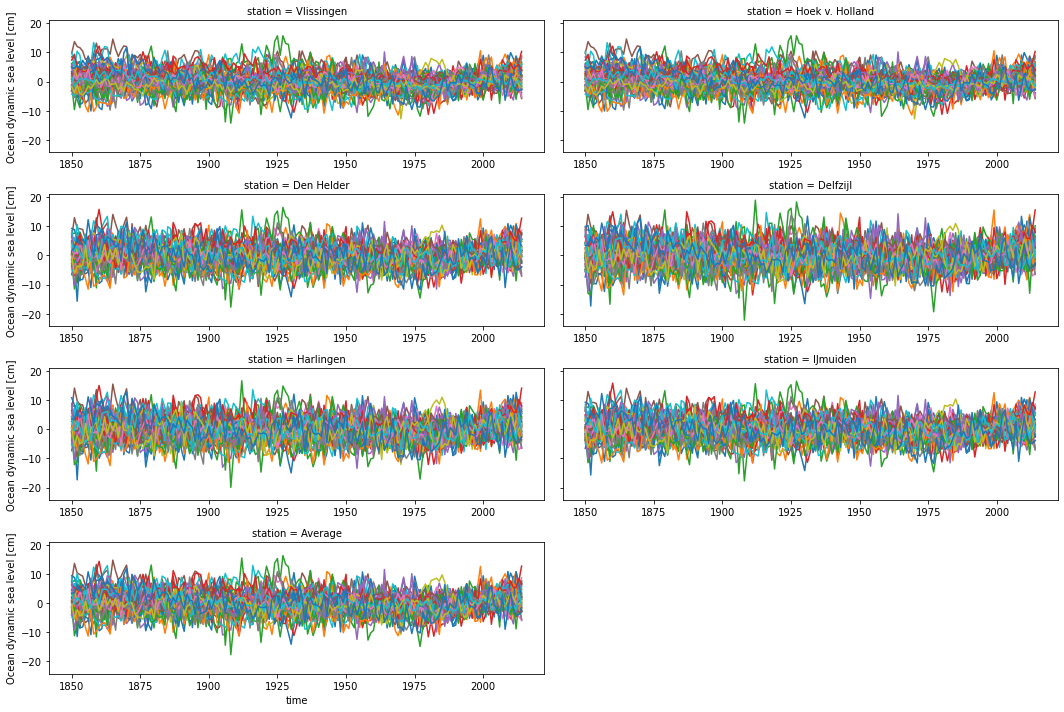

In [4]:
figs.plot_zos_data(zos, data_type)

#### Import and plot nearby wind data

In [5]:
wind_data = imprt.import_cmip6_wind_data(model = 'Nearest Point', data_type = 'historical')

In [6]:
wind_data.u2

<xarray.DataArray 'u2' (station: 7, model: 43, time: 165)>
array([[[ 1.1559315 ,  2.37075087,  4.90198328, ...,  1.58238239,
          1.61584173,  0.58232743],
        [ 4.57329776,  4.1816103 ,  4.09735807, ...,  4.37271471,
          1.43641764,  1.36052846],
        [ 4.46584658,  4.98796033,  3.5851035 , ...,  2.42678249,
          2.11244538,  2.38917542],
        ...,
        [ 6.73527921,  3.66118595,  4.20044047, ...,  7.03266442,
          7.1831063 , 14.51157019],
        [ 8.19746815,  7.93730778, 12.68866865, ..., 13.14153494,
         10.17736604, 11.12789428],
        [ 1.19666137,  3.12979828,  6.33933091, ...,  0.32274495,
          2.47794067,  1.69945177]],

       [[ 1.00602331,  1.95795809,  3.82518437, ...,  1.36457384,
          1.1944497 ,  0.55176827],
        [ 2.94471489,  2.88138653,  2.69309317, ...,  2.75677534,
          1.06976746,  0.90548612],
        [ 3.4394896 ,  4.05924568,  2.92311435, ...,  1.84220925,
          1.61860263,  1.80595371],
...
        [ 8.06773956,  3.21073953,  3.56338608, ...,  7.07489508,
          6.97574409, 15.24283622],
        [ 8.9419122 ,  9.35060376, 14.2560489 , ..., 15.04440258,
         12.07982802, 13.35674361],
        [ 1.93476387,  4.2164423 ,  8.12757783, ...,  0.35728727,
          3.12961707,  2.63387374]],

       [[ 1.82662593,  2.87476561,  5.31083805, ...,  1.94851343,
          1.65549375,  1.20149623],
        [ 7.5151916 ,  7.76309332,  6.22759484, ...,  5.88071664,
          2.77945769,  1.72905926],
        [ 4.20114211,  5.58441961,  3.90747461, ...,  2.0182049 ,
          2.14914844,  2.32171881],
        ...,
        [ 7.72682273,  3.02234802,  3.36608815, ...,  6.71265833,
          6.74987394, 14.83885088],
        [ 8.35663982,  8.94068124, 13.53151096, ..., 14.22727864,
         11.54586594, 12.88655894],
        [ 2.06413227,  3.92659916,  7.57215543, ...,  0.37074123,
          2.99028522,  2.63904983]]])
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * station  (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
Attributes:
    units:    m$^2$/s$^2$

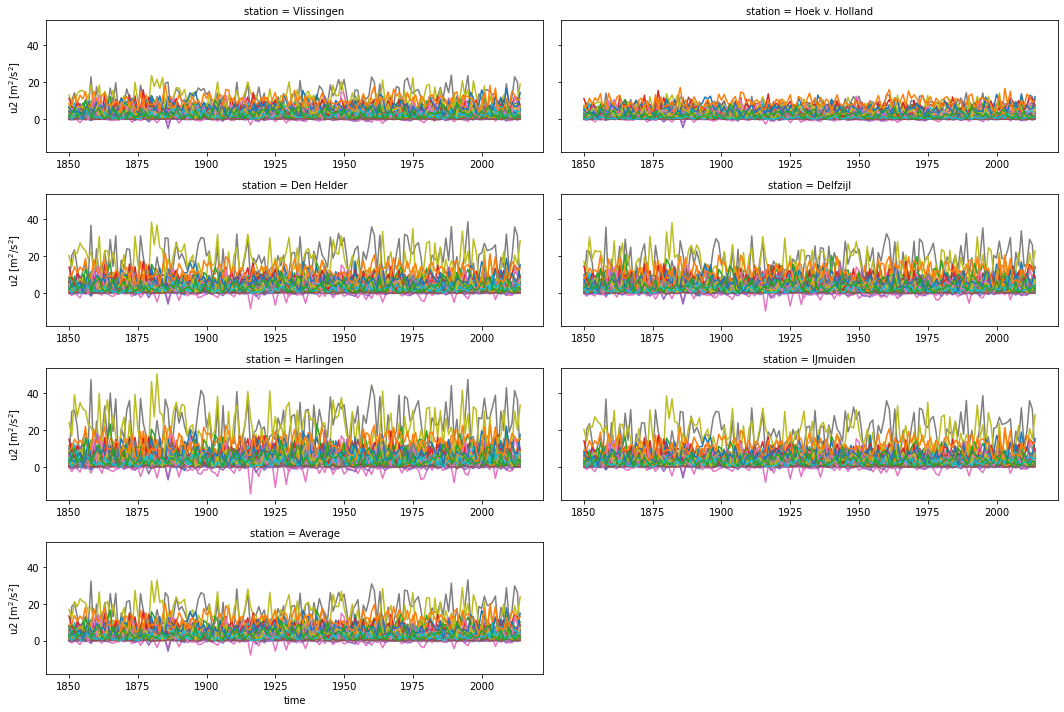

In [7]:
figs.plot_cmip6_wind_data(wind_data, 'u2', data_type)

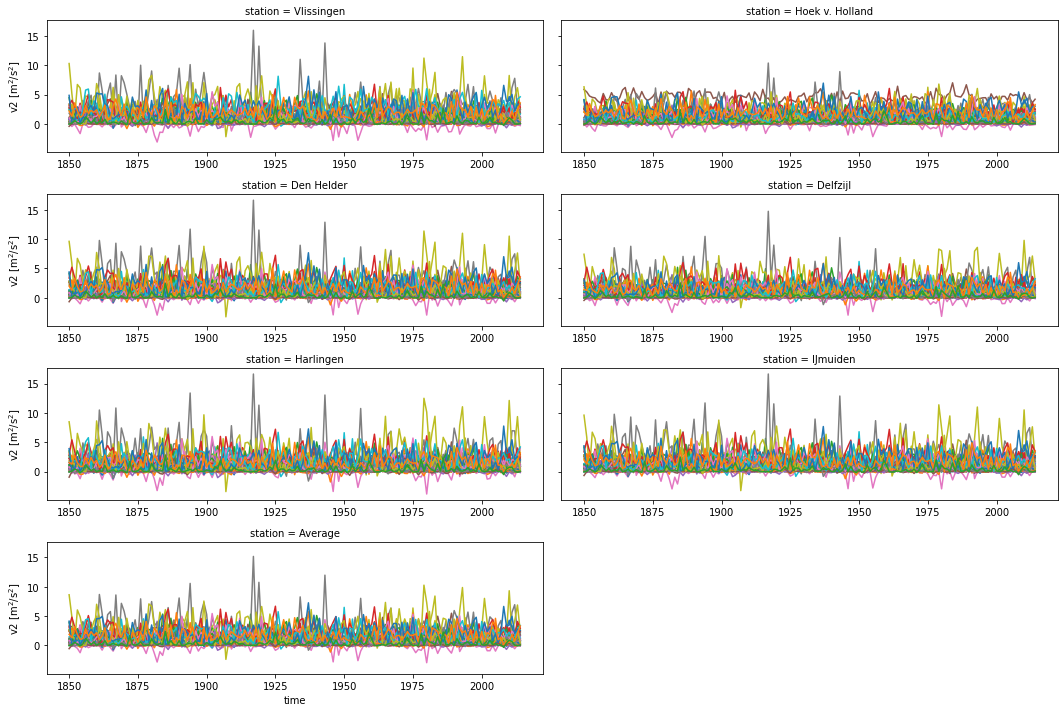

In [8]:
figs.plot_cmip6_wind_data(wind_data, 'v2', data_type)

### Perform regression

In [21]:
results, timeseries = regres.regression_cmip6(wind_data, zos, wind_model = 'NearestPoint')

In [22]:
timeseries 

<xarray.Dataset>
Dimensions:     (model: 37, station: 7, time: 165)
Coordinates:
  * time        (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * station     (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    u2          (model, station, time) float64 -0.5098 0.7965 ... -0.649 -0.9302
    v2          (model, station, time) float64 0.7675 1.143 ... -0.7671 -0.5397
    trend       (model, station, time) float64 -2.119 -2.093 ... -4.208 -4.259
    total       (model, station, time) float64 -1.862 -0.1536 ... -5.624 -5.729
    wind_total  (model, station, time) float64 0.2577 1.94 ... -1.416 -1.47

In [109]:
results

<xarray.Dataset>
Dimensions:     (model: 37, station: 7)
Coordinates:
  * station     (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    r2          (model, station) float64 0.3758 0.443 0.6434 ... 0.4934 0.09553
    rmse        (model, station) float64 3.383 3.333 3.506 ... 2.937 2.808 2.804
    constant    (model, station) float64 0.3237 0.3237 0.5723 ... -0.03851 0.327
    u2_coef     (model, station) float64 1.546 1.645 2.219 ... 2.576 2.657 2.228
    v2_coef     (model, station) float64 -1.357 -1.454 -1.22 ... 1.09 0.846
    trend_coef  (model, station) float64 1.231 1.236 1.169 ... -2.272 -2.474

#### Plot results

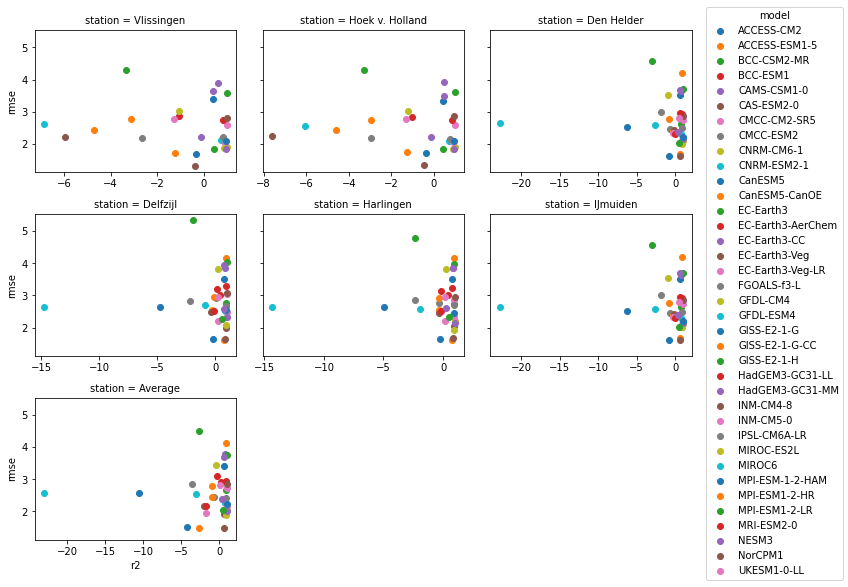

In [104]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

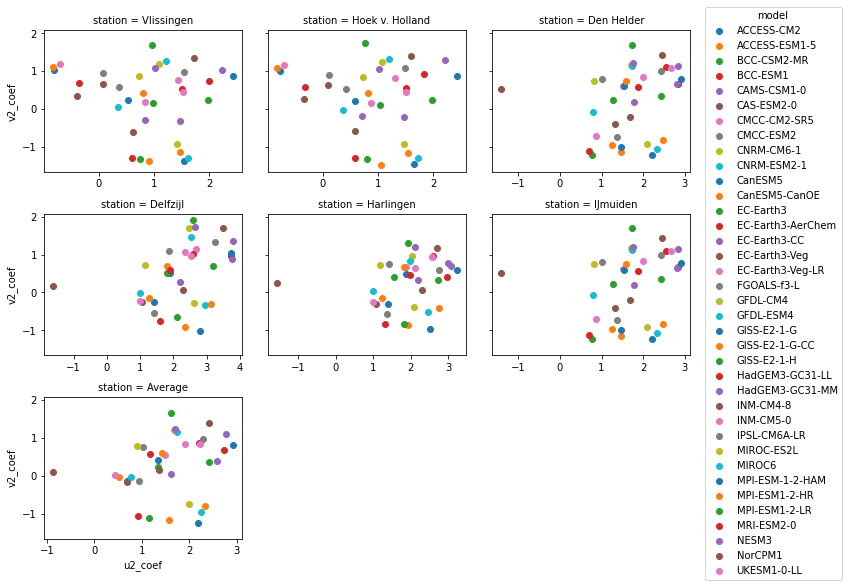

In [105]:
figs.plot_cmip6_two_variables(results, 'u2_coef', 'v2_coef', data_type)

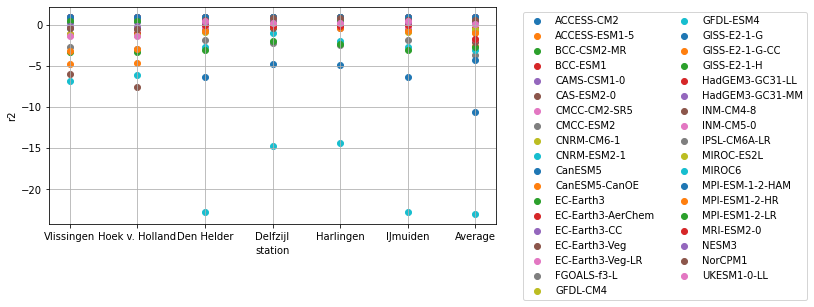

In [111]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type)

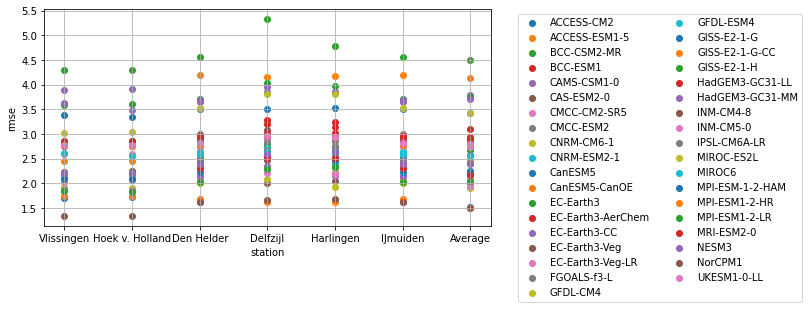

In [112]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

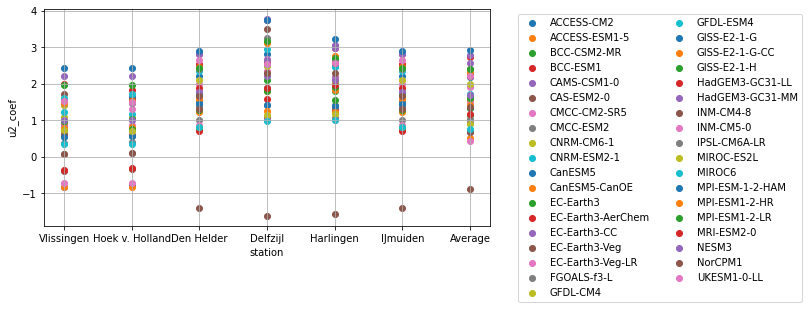

In [113]:
figs.plot_cmip6_result_per_station(results, 'u2_coef', data_type)

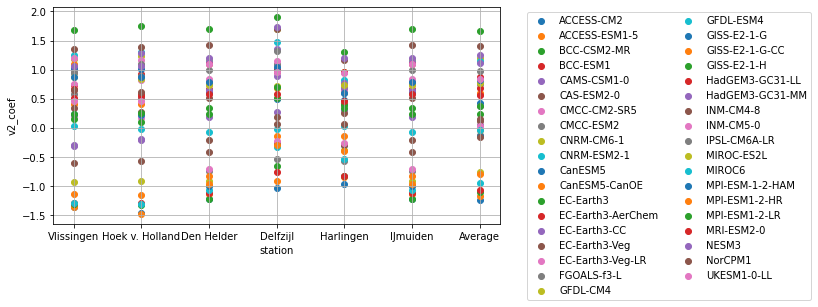

In [114]:
figs.plot_cmip6_result_per_station(results, 'v2_coef', data_type)

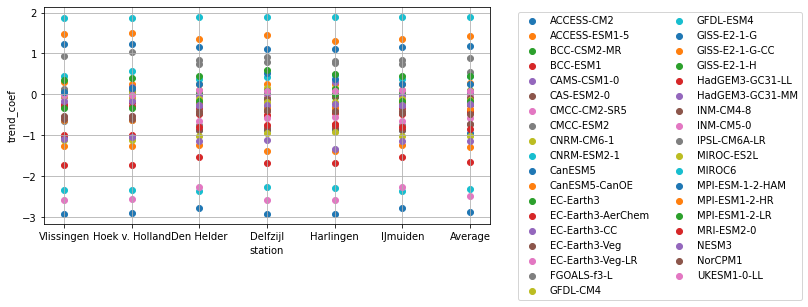

In [115]:
figs.plot_cmip6_result_per_station(results, 'trend_coef', data_type)

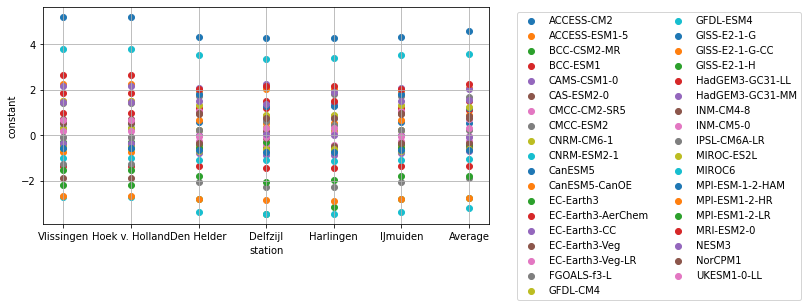

In [116]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

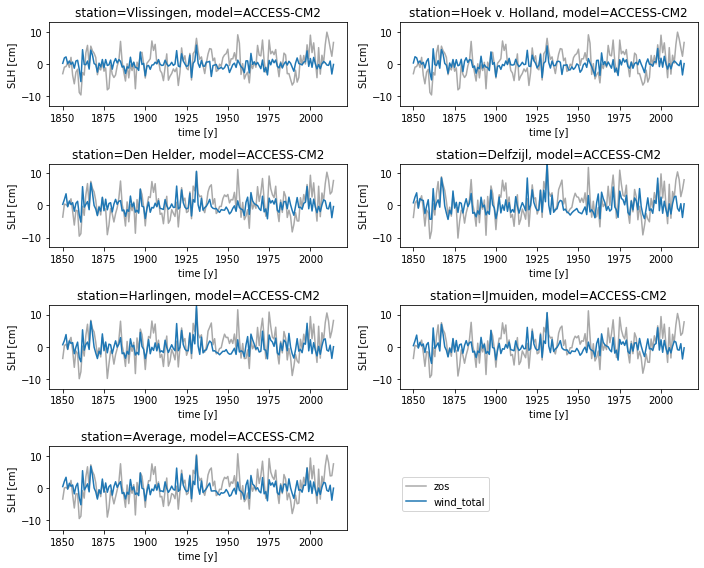

In [242]:
figs.timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['wind_total'])

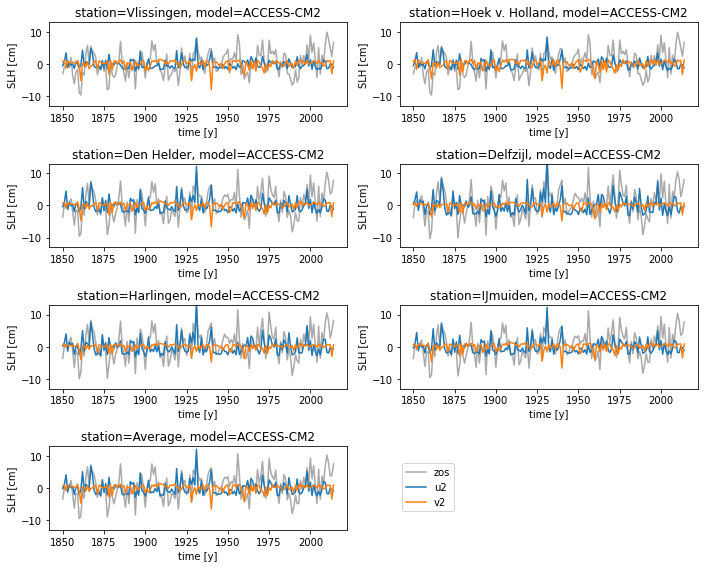

In [243]:
figs.timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['u2', 'v2'])

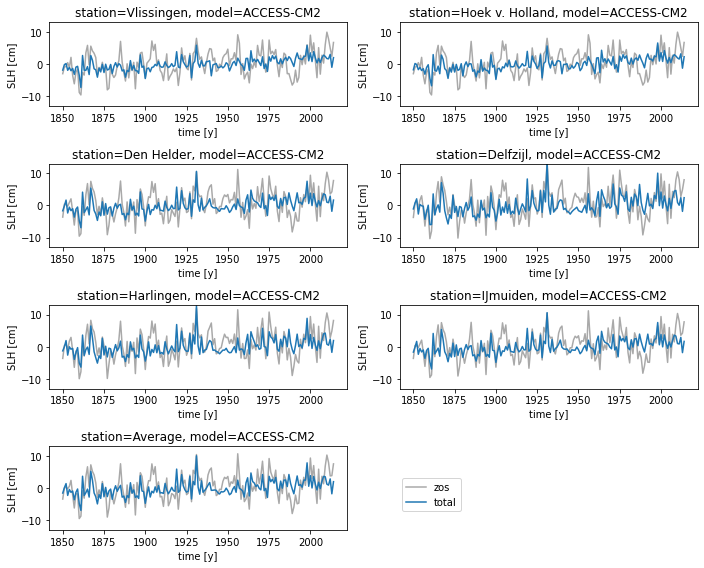

In [245]:
figs.timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['total'])